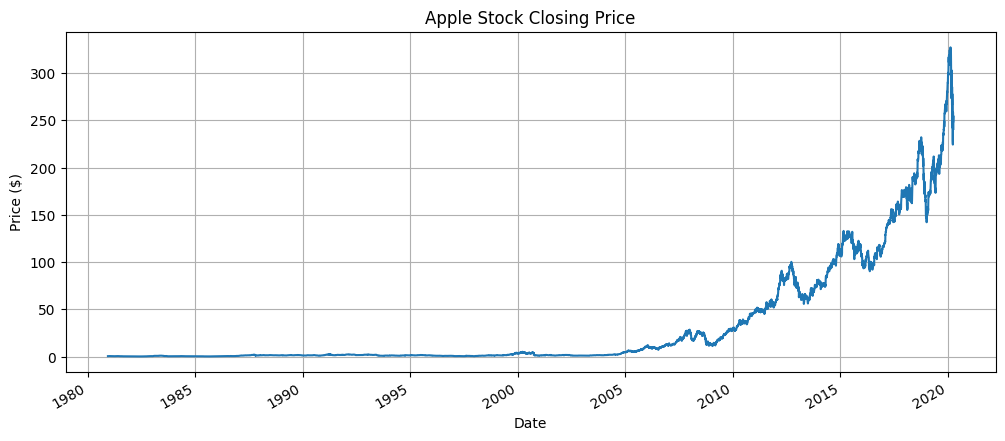

RMSE: 2.93


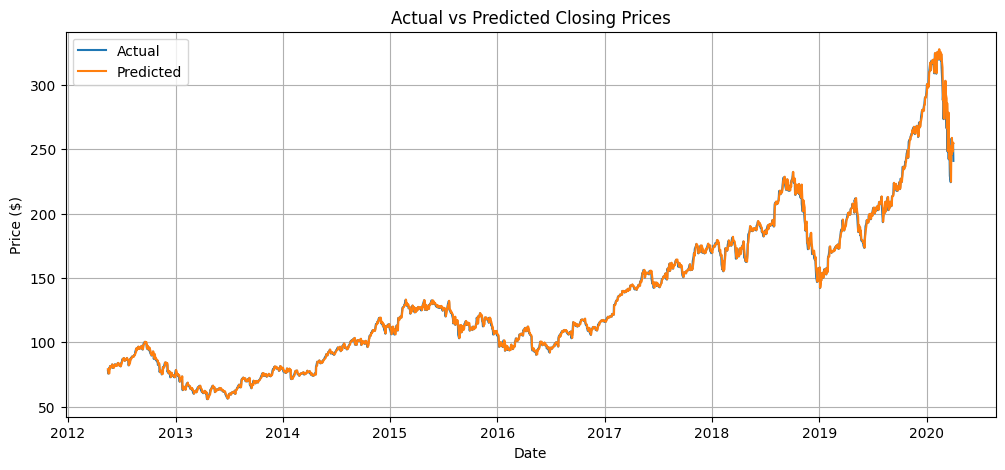

In [1]:
# Task 2: Stock Price Prediction Using Machine Learning
# Dataset: AAPL.csv (Apple stock data)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. Load Data
df = pd.read_csv("AAPL.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# 2. Visualize Close Price
df.set_index('Date')['Close'].plot(figsize=(12, 5), title='Apple Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

# 3. Feature Engineering
# We will predict 'Close' using previous day's 'Close'
df['Prev_Close'] = df['Close'].shift(1)
df = df.dropna()

X = df[['Prev_Close']]
y = df['Close']

# 4. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 5. Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Make Predictions
y_pred = model.predict(X_test)

# 7. Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

# 8. Visualization
plt.figure(figsize=(12,5))
plt.plot(df['Date'].iloc[-len(y_test):], y_test.values, label='Actual')
plt.plot(df['Date'].iloc[-len(y_test):], y_pred, label='Predicted')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()
